In [1]:
# ! pip install kaggle
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [2]:
# !kaggle datasets download -d uditsharma72/real-vs-fake-faces

In [3]:
# !mkdir data
# !unzip real-vs-fake-faces.zip -d /content/data

In [4]:
# !rm -r ./data

**1. Impotin Dependencies**

In [5]:
import numpy as np 
import tensorflow as tf
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

**2. Load Data**

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 2041 files belonging to 2 classes.


In [7]:
class_names = data.class_names
class_names

['fake', 'real']

In [8]:
data_iterator = data.as_numpy_iterator()
batch = data_iterator.next()

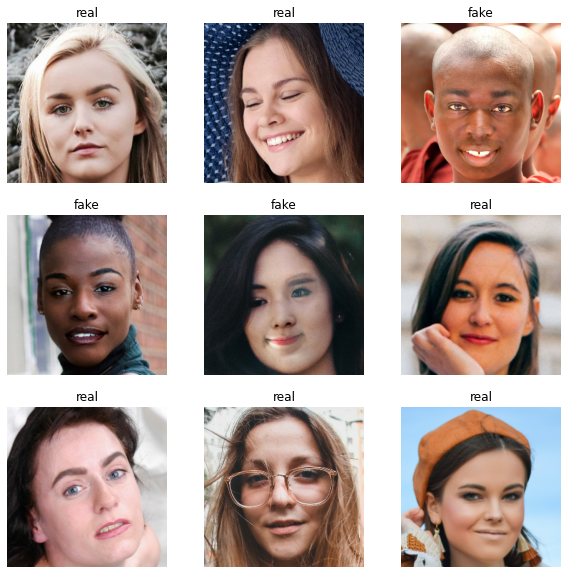

In [9]:
plt.figure(figsize=(10, 10))
for images, labels in data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

**3. Scale Data**

In [ ]:
data = data.map(lambda x,y: (x/255, y)) # x/255
data.as_numpy_iterator().next()

**4. Split Data**

In [11]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

**5. Build Deep Learning Model**

In [13]:
model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

loss = loss=tf.losses.BinaryCrossentropy()
model.compile(loss=loss, optimizer='adam',  metrics=["accuracy"])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

**6. Train**

In [15]:
logdir='logs'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [16]:
hist = model.fit(train, epochs=8, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/8
44/44 [==============================] - 123s 3s/step - loss: 0.7107 - accuracy: 0.5433 - val_loss: 0.6907 - val_accuracy: 0.5781
Epoch 2/8
44/44 [==============================] - 99s 2s/step - loss: 0.6789 - accuracy: 0.6009 - val_loss: 0.6631 - val_accuracy: 0.6068
Epoch 3/8
44/44 [==============================] - 101s 2s/step - loss: 0.6472 - accuracy: 0.6257 - val_loss: 0.6551 - val_accuracy: 0.6146
Epoch 4/8
44/44 [==============================] - 97s 2s/step - loss: 0.6262 - accuracy: 0.6506 - val_loss: 0.6415 - val_accuracy: 0.6094
Epoch 5/8
44/44 [==============================] - 98s 2s/step - loss: 0.5666 - accuracy: 0.6960 - val_loss: 0.6509 - val_accuracy: 0.6615
Epoch 6/8
44/44 [==============================] - 97s 2s/step - loss: 0.5064 - accuracy: 0.7493 - val_loss: 0.6705 - val_accuracy: 0.6328
Epoch 7/8
44/44 [==============================] - 100s 2s/step - loss: 0.4242 - accuracy: 0.8125 - val_loss: 0.6867 - val_accuracy: 0.6927
Epoch 8/8
44/44 [=======

**7. Plot Performance**

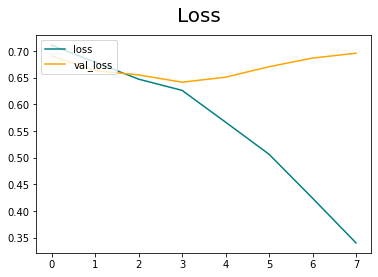

In [17]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

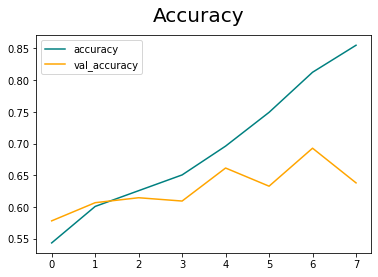

In [18]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

**8.Evaluate**

In [19]:
loss, accuracy = model.evaluate(test)

6/6 [==============================] - 16s 430ms/step - loss: 0.8260 - accuracy: 0.5729


In [20]:
print("Loss: ", loss)
print("Accuracy: ", accuracy)

Loss:  0.8259922862052917
Accuracy:  0.5729166865348816
